In [2]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_directory = "./chest_xray/train/"
test_directory = "./chest_xray/test/"
validation_directory = "./chest_xray/val/"

In [4]:
train_data = ImageDataGenerator(rescale=1/255) # Normalizando os pixels da imagem
validation_data = ImageDataGenerator(rescale=1/255)
test_data = ImageDataGenerator(rescale=1/255)

In [7]:
train_generator_vgg16 = train_data.flow_from_directory(train_directory, target_size=(224,224), batch_size=8 ,class_mode="binary")
test_generator_vgg16 = train_data.flow_from_directory(test_directory, target_size=(224,224), class_mode="binary")
validation_generator_vgg16 = train_data.flow_from_directory(validation_directory, target_size=(224,224), class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [8]:
#vgg16
model_vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))



58889256/58889256 [==============================] - 6s 0us/step


In [9]:
for layer in model_vgg16.layers:
    layer.trainable = False

In [10]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model_with_vgg16 = Sequential()
model_with_vgg16.add(model_vgg16)
model_with_vgg16.add(Flatten())
model_with_vgg16.add(Dense(128, activation="relu"))
model_with_vgg16.add(Dense(64, activation="relu"))
model_with_vgg16.add(Dense(1, activation="sigmoid"))

In [12]:
model_with_vgg16.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])


In [14]:
history = model_with_vgg16.fit(train_generator_vgg16, epochs=4, validation_data=validation_generator_vgg16)

Epoch 1/4
652/652 [==============================] - 366s 561ms/step - loss: 0.0625 - acc: 0.9764 - val_loss: 0.1650 - val_acc: 0.9375
Epoch 2/4
652/652 [==============================] - 366s 561ms/step - loss: 0.0461 - acc: 0.9843 - val_loss: 0.6136 - val_acc: 0.8125
Epoch 3/4
652/652 [==============================] - 367s 563ms/step - loss: 0.0347 - acc: 0.9883 - val_loss: 0.5257 - val_acc: 0.8125
Epoch 4/4
652/652 [==============================] - 369s 565ms/step - loss: 0.0359 - acc: 0.9877 - val_loss: 0.3050 - val_acc: 0.8750


In [15]:
test_loss, test_accuracy = model_with_vgg16.evaluate(test_generator_vgg16)
print(f"{test_loss}, accuracia {test_accuracy}")

20/20 [==============================] - 40s 2s/step - loss: 1.4854 - acc: 0.7564
1.4853781461715698, accuracia 0.7564102411270142


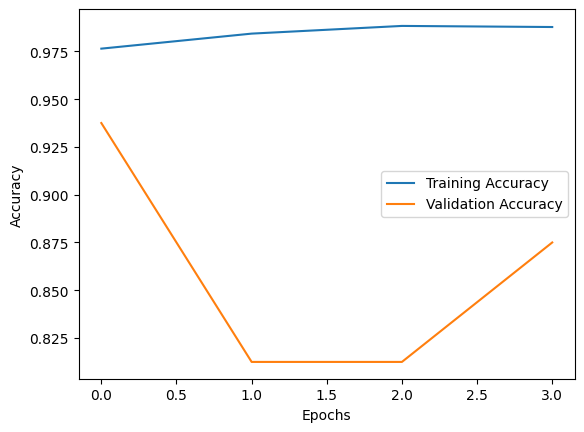

In [16]:
plt.plot(history.history["acc"], label="Training Accuracy")
plt.plot(history.history["val_acc"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()